**INSTRUCTIONS**

Every learner should submit his/her own homework solutions. However, you are allowed to discuss the homework with each other– but everyone must submit his/her own solution; you may not copy someone else’s solution.

The homework consists of two parts:

    1. Data from our lives
    2. Variable selection

Follow the prompts in the attached jupyter notebook.

**We are using the same data as for the previous homework**. Use the version you created called **df2** where you already cleaned, dropped some of the variables and also created the dummy variables.

Add markdown cells to your analysis to include your solutions, comments, answers. Add as many cells as you need, for easy readability comment when possible. Hopefully this homework will help you develop skills, make you understand the flow of an EDA, get you ready for individual work.

**Note:** This homework has a bonus question, so the highest mark that can be earned is a 105.

Submission: Send in both a ipynb and a pdf file of your work.

Good luck!


# 1. Data from our lives:

### Describe a situation or problem from your job, everyday life, current events, etc., for which a variable selection/feature reduction would be appropriate.

*Your Answer:*

Situation: Predicting Product Defects in Manufacturing

In a manufacturing setting, a company produces a certain product on an assembly line. The production process involves various factors such as temperature, pressure, machine settings, and raw material quality. The company wants to implement a machine learning model to predict whether a product will have defects based on these production-related features.

Problem: Multivariate Data and Redundant Features

The dataset collected from the production line contains a multitude of features, including sensor readings, production parameters, and quality control measurements. However, not all features may be equally important for predicting product defects. Some features may be redundant or highly correlated, leading to potential multicollinearity issues.

Solution: Variable Selection for Defect Prediction

To address this issue, variable selection or feature reduction techniques can be applied. The goal is to identify the subset of features that most effectively capture the factors contributing to product defects.

Methods like LASSO (Least Absolute Shrinkage and Selection Operator), or correlation analysis can help identify and prioritize the most relevant features for defect prediction. This process aids in building a more focused and efficient model, improving the accuracy of defect predictions, and potentially providing insights into the root causes of defects in the manufacturing process.

By reducing the dimensionality of the feature space, the model becomes more interpretable, and the manufacturing process can be optimized based on the critical variables identified through the feature selection process. This not only helps in minimizing product defects but also contributes to overall process efficiency and cost reduction.

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [39]:
path="/content/drive/MyDrive/DATASET/auto_imports1.csv"
df = pd.read_csv(path)
df.head()

,fuel_type,body,wheel_base,length,width,heights,curb_weight,engine_type,cylinders,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,gas,hatchback,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,gas,sedan,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.4,10.0,102,5500,24,30,13950
4,gas,sedan,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.4,8.0,115,5500,18,22,17450


##Data Munging

In [40]:
data_types = df.dtypes
print(data_types)

fuel_type       object
body            object
wheel_base     float64
length         float64
width          float64
heights        float64
curb_weight      int64
engine_type     object
cylinders       object
engine_size      int64
bore            object
stroke          object
comprassion    float64
horse_power     object
peak_rpm        object
city_mpg         int64
highway_mpg      int64
price            int64
dtype: object


In [41]:
df = df.replace('?', None)

columns_to_convert = ['bore', 'stroke', 'horse_power', 'peak_rpm']
df[columns_to_convert] = df[columns_to_convert].astype('float64')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    201 non-null    object 
 1   body         201 non-null    object 
 2   wheel_base   201 non-null    float64
 3   length       201 non-null    float64
 4   width        201 non-null    float64
 5   heights      201 non-null    float64
 6   curb_weight  201 non-null    int64  
 7   engine_type  201 non-null    object 
 8   cylinders    201 non-null    object 
 9   engine_size  201 non-null    int64  
 10  bore         197 non-null    float64
 11  stroke       197 non-null    float64
 12  comprassion  201 non-null    float64
 13  horse_power  199 non-null    float64
 14  peak_rpm     199 non-null    float64
 15  city_mpg     201 non-null    int64  
 16  highway_mpg  201 non-null    int64  
 17  price        201 non-null    int64  
dtypes: float64(9), int64(5), object(4)
memory usage: 2

In [43]:
df2 = df.drop(['body', 'engine_type', 'cylinders'], axis=1)

In [44]:
df2.head()

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,gas,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,gas,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,gas,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [45]:
df2 = df2.dropna()
df2.isnull().sum()

fuel_type      0
wheel_base     0
length         0
width          0
heights        0
curb_weight    0
engine_size    0
bore           0
stroke         0
comprassion    0
horse_power    0
peak_rpm       0
city_mpg       0
highway_mpg    0
price          0
dtype: int64

##Get dummy variables for fuel_type within df2 drop first leve

In [46]:
df2 = pd.get_dummies(df2, columns=['fuel_type'], drop_first=True)

In [47]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 200
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   wheel_base     195 non-null    float64
 1   length         195 non-null    float64
 2   width          195 non-null    float64
 3   heights        195 non-null    float64
 4   curb_weight    195 non-null    int64  
 5   engine_size    195 non-null    int64  
 6   bore           195 non-null    float64
 7   stroke         195 non-null    float64
 8   comprassion    195 non-null    float64
 9   horse_power    195 non-null    float64
 10  peak_rpm       195 non-null    float64
 11  city_mpg       195 non-null    int64  
 12  highway_mpg    195 non-null    int64  
 13  price          195 non-null    int64  
 14  fuel_type_gas  195 non-null    uint8  
dtypes: float64(9), int64(5), uint8(1)
memory usage: 23.0 KB


#EDA on df2

##Step 1 :Descriptions and features

In [48]:
df2.head()

,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price,fuel_type_gas
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495,1
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500,1
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500,1
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950,1
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450,1


In [49]:
df2.tail()

,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price,fuel_type_gas
196,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845,1
197,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045,1
198,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485,1
199,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470,0
200,109.1,188.8,68.9,55.5,3062,141,3.78,3.15,9.5,114.0,5400.0,19,25,22625,1


In [50]:
df2.describe()

,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price,fuel_type_gas
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,98.896410,174.256923,65.886154,53.861538,2559.000000,127.938462,3.329385,3.250308,10.194974,103.271795,5099.487179,25.374359,30.841026,13248.015385,0.897436
std,6.132038,12.476443,2.132484,2.396778,524.715799,41.433916,0.271866,0.314115,4.062109,37.869730,468.271381,6.401382,6.829315,8056.330093,0.304170
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,0.000000
25%,94.500000,166.300000,64.050000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.500000,25.000000,7756.500000,1.000000
50%,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000,1.000000
75%,102.400000,184.050000,66.900000,55.650000,2943.500000,145.500000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.000000,16509.000000,1.000000
max,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,1.000000


In [51]:
df2.shape

(195, 15)

In [52]:
df2.columns

Index(['wheel_base', 'length', 'width', 'heights', 'curb_weight',
       'engine_size', 'bore', 'stroke', 'comprassion', 'horse_power',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'price', 'fuel_type_gas'],
      dtype='object')

In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 200
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   wheel_base     195 non-null    float64
 1   length         195 non-null    float64
 2   width          195 non-null    float64
 3   heights        195 non-null    float64
 4   curb_weight    195 non-null    int64  
 5   engine_size    195 non-null    int64  
 6   bore           195 non-null    float64
 7   stroke         195 non-null    float64
 8   comprassion    195 non-null    float64
 9   horse_power    195 non-null    float64
 10  peak_rpm       195 non-null    float64
 11  city_mpg       195 non-null    int64  
 12  highway_mpg    195 non-null    int64  
 13  price          195 non-null    int64  
 14  fuel_type_gas  195 non-null    uint8  
dtypes: float64(9), int64(5), uint8(1)
memory usage: 23.0 KB


##Step 2 :Checking Missing value

In [54]:
print("There are {} missing values in the data.".format(df2.isna().sum().sum()))

There are 0 missing values in the data.


##Step 3 :Checking the shape of the data

<Figure size 2500x500 with 0 Axes>

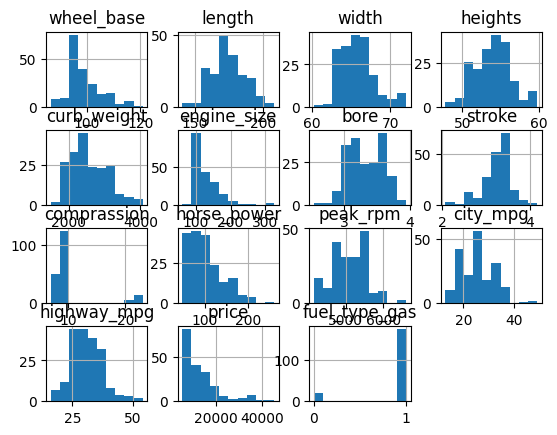

In [55]:
plt.figure(figsize=(25,5))
df2.hist()
plt.show()

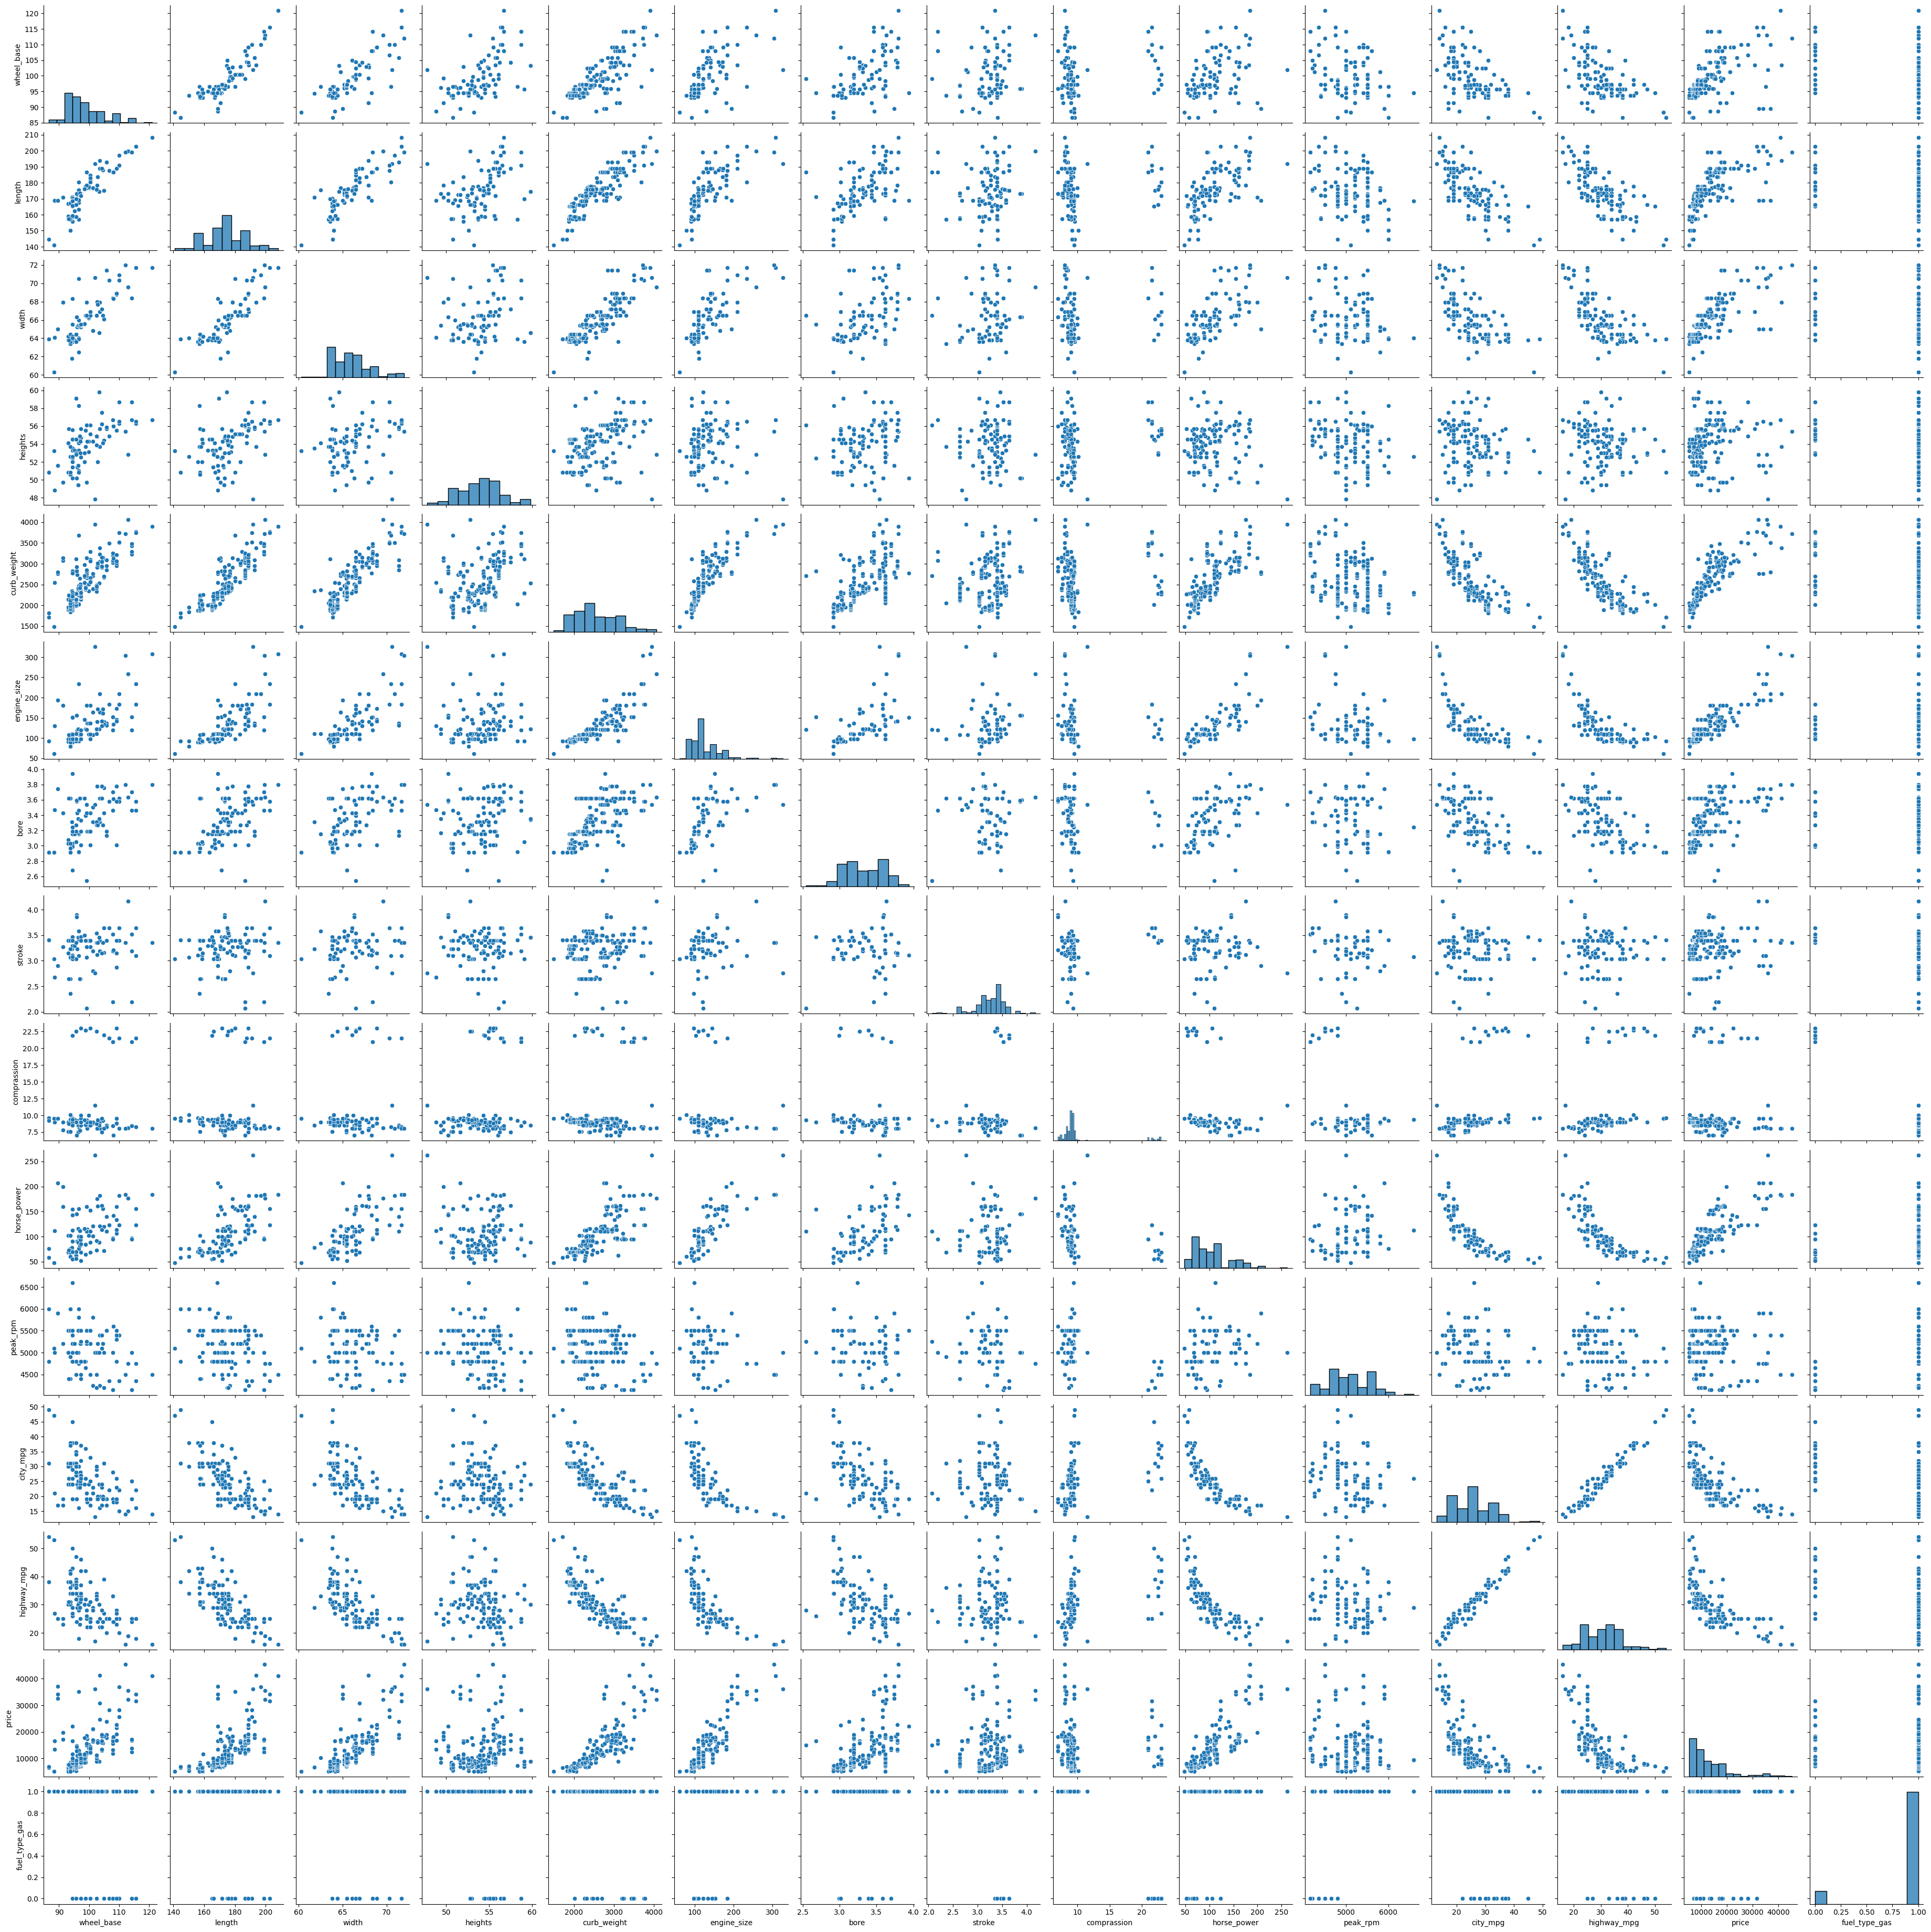

In [ ]:
sns.pairplot(df2)

##Step 4 :Identifying significant correlations

In [56]:
df2.corr(method='pearson')

,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price,fuel_type_gas
wheel_base,1.000000,0.879222,0.819009,0.592500,0.782720,0.569704,0.498228,0.171722,0.247730,0.375541,-0.352331,-0.499126,-0.566355,0.585793,-0.303643
length,0.879222,1.000000,0.858084,0.496218,0.881665,0.687479,0.609437,0.118664,0.160172,0.583813,-0.280986,-0.689660,-0.719324,0.695331,-0.210618
width,0.819009,0.858084,1.000000,0.315834,0.867315,0.740320,0.544311,0.186432,0.190997,0.616779,-0.251627,-0.647099,-0.692220,0.754273,-0.245375
heights,0.592500,0.496218,0.315834,1.000000,0.307732,0.031286,0.189283,-0.055525,0.261160,-0.084412,-0.264078,-0.102367,-0.151188,0.138291,-0.279070
curb_weight,0.782720,0.881665,0.867315,0.307732,1.000000,0.857573,0.645806,0.172785,0.155382,0.760285,-0.278944,-0.772171,-0.812710,0.835729,-0.219488
engine_size,0.569704,0.687479,0.740320,0.031286,0.857573,1.000000,0.583091,0.211989,0.024617,0.842691,-0.219008,-0.710624,-0.732138,0.888942,-0.063490
bore,0.498228,0.609437,0.544311,0.189283,0.645806,0.583091,1.000000,-0.066793,0.003057,0.568527,-0.277662,-0.591950,-0.600040,0.546873,-0.056245
stroke,0.171722,0.118664,0.186432,-0.055525,0.172785,0.211989,-0.066793,1.000000,0.199882,0.100040,-0.068300,-0.027641,-0.036453,0.093746,-0.253774
comprassion,0.247730,0.160172,0.190997,0.261160,0.155382,0.024617,0.003057,0.199882,1.000000,-0.214401,-0.444582,0.331413,0.267941,0.069500,-0.985398
horse_power,0.375541,0.583813,0.616779,-0.084412,0.760285,0.842691,0.568527,0.100040,-0.214401,1.000000,0.105654,-0.834117,-0.812917,0.811027,0.168454


<Axes: >

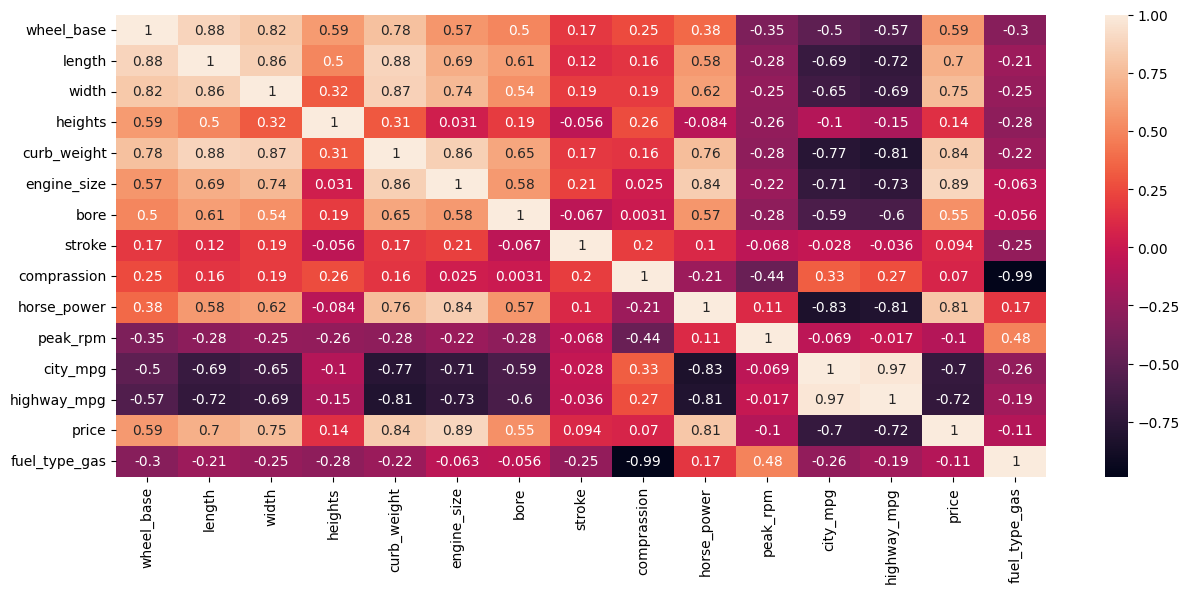

In [57]:
plt.figure(figsize=(15,6))
correlation= df2.corr('pearson')
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot= True)

##Step 5: Detecting and Handling outliers

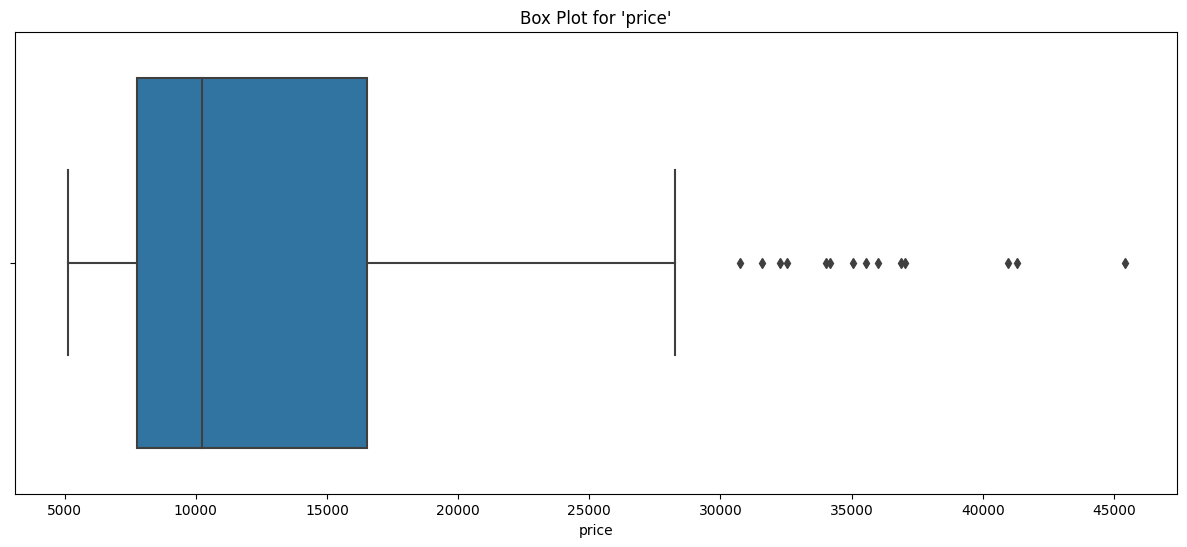

In [58]:
plt.figure(figsize=(15, 6))
sns.boxplot(x=df2['price'])
plt.title("Box Plot for 'price'")
plt.show()

In [59]:
df2[df2["price"] >30000]

,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price,fuel_type_gas
14,103.5,189.0,66.9,55.7,3230,209,3.62,3.39,8.0,182.0,5400.0,16,22,30760,1
15,103.5,193.8,67.9,53.7,3380,209,3.62,3.39,8.0,182.0,5400.0,16,22,41315,1
16,110.0,197.0,70.9,56.3,3505,209,3.62,3.39,8.0,182.0,5400.0,15,20,36880,1
44,113.0,199.6,69.6,52.8,4066,258,3.63,4.17,8.1,176.0,4750.0,15,19,32250,1
45,113.0,199.6,69.6,52.8,4066,258,3.63,4.17,8.1,176.0,4750.0,15,19,35550,1
46,102.0,191.7,70.6,47.8,3950,326,3.54,2.76,11.5,262.0,5000.0,13,17,36000,1
67,115.6,202.6,71.7,56.3,3770,183,3.58,3.64,21.5,123.0,4350.0,22,25,31600,0
68,115.6,202.6,71.7,56.5,3740,234,3.46,3.10,8.3,155.0,4750.0,16,18,34184,1
69,96.6,180.3,70.5,50.8,3685,234,3.46,3.10,8.3,155.0,4750.0,16,18,35056,1
70,120.9,208.1,71.7,56.7,3900,308,3.80,3.35,8.0,184.0,4500.0,14,16,40960,1


In [60]:
df2.drop(14,inplace=True)
df2.drop(15,inplace=True)
df2.drop(16,inplace=True)
df2.drop(44,inplace=True)
df2.drop(45,inplace=True)
df2.drop(46,inplace=True)
df2.drop(65,inplace=True)
df2.drop(66,inplace=True)
df2.drop(67,inplace=True)
df2.drop(68,inplace=True)
df2.drop(69,inplace=True)
df2.drop(70,inplace=True)
df2.drop(71,inplace=True)
df2.drop(123,inplace=True)
df2.drop(124,inplace=True)
df2.drop(125,inplace=True)

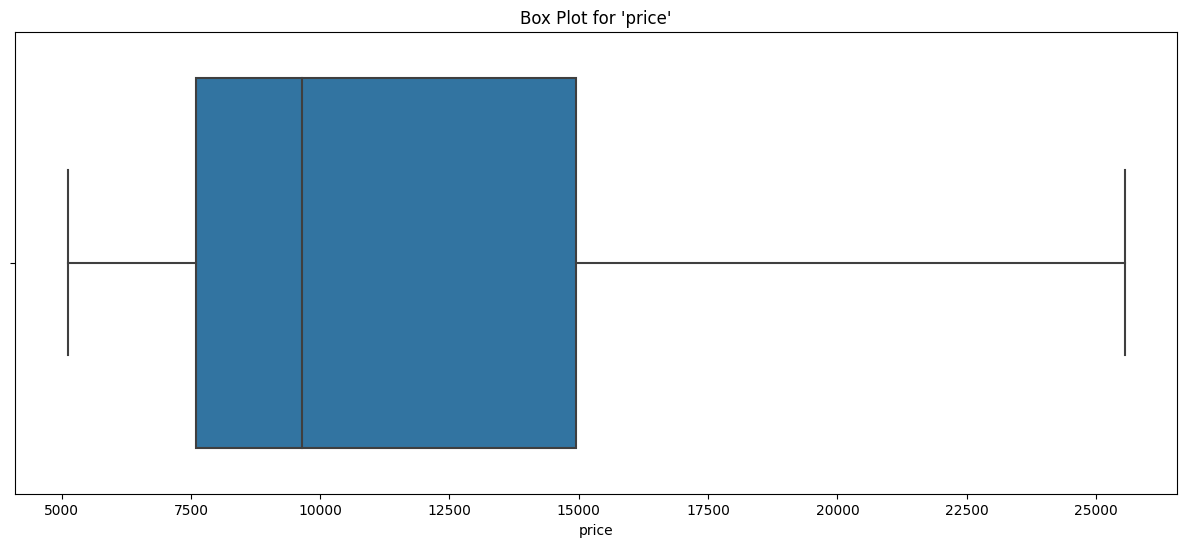

In [61]:
plt.figure(figsize=(15, 6))
sns.boxplot(x=df2['price'])
plt.title("Box Plot for 'price'")
plt.show()

# 2. Variable selection

In our class so far we covered three types of feature selection techniques. They were:
1. Filter methods
2. Wrapper methods
3. Embedded methods

Use the dataset 'auto_imports1.csv' from our previous homework. More specifically, use the version you created called **df2** where you already cleaned, dropped some of the variables and also created the dummy variables.

### 2.1. Filtered methods

Choose one (you may do more, one is required) of the filtered methods to conduct variable selection. Report your findigs

###Using ANOVA(F-VALUE)

In [62]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming 'price' as the dependent variable, and to perform ANOVA for variable selection
formula = 'price ~ wheel_base + length + width + heights + curb_weight + engine_size + bore + stroke + comprassion + horse_power + peak_rpm + city_mpg + highway_mpg + fuel_type_gas'

# Fit the OLS (Ordinary Least Squares) model
model = ols(formula, data=df2).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print(anova_table)


                     sum_sq     df          F    PR(>F)
wheel_base     1.985771e+07    1.0   4.102283  0.044447
length         1.250808e+07    1.0   2.583967  0.109874
width          3.917482e+07    1.0   8.092888  0.005011
heights        7.662985e+04    1.0   0.015830  0.900029
curb_weight    2.993397e+07    1.0   6.183876  0.013893
engine_size    2.197337e+06    1.0   0.453935  0.501421
bore           1.175168e+07    1.0   2.427709  0.121135
stroke         2.578609e+07    1.0   5.326991  0.022247
comprassion    2.272218e+07    1.0   4.694036  0.031711
horse_power    6.326451e+07    1.0  13.069431  0.000399
peak_rpm       6.302263e+04    1.0   0.013019  0.909296
city_mpg       3.411224e+07    1.0   7.047039  0.008722
highway_mpg    1.611827e+07    1.0   3.329775  0.069856
fuel_type_gas  1.234780e+07    1.0   2.550857  0.112159
Residual       7.938662e+08  164.0        NaN       NaN


### 2.2. Wrapper methods

Choose one (you may do more, one is required) of the wrapper methods to conduct variable selection. Report your findigs.

### Using Forward selection

In [63]:
import statsmodels.api as sm

def forward_selection(X, y, significance_level=0.05):
    selected_features = []
    remaining_features = set(X.columns)

    while remaining_features:
        best_pvalue = float('inf')
        best_feature = None

        for feature in remaining_features:
            model_features = selected_features + [feature]
            X_subset = X[model_features]
            X_subset = sm.add_constant(X_subset)

            model = sm.OLS(y, X_subset).fit()
            pvalue = model.pvalues[feature]

            if pvalue < best_pvalue:
                best_pvalue = pvalue
                best_feature = feature

        if best_pvalue < significance_level:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            break

    return selected_features

# Assuming 'price' is the dependent variable, and X contains the independent variables
X = df2.drop('price', axis=1)
y = df2['price']

# Perform forward selection
selected_features_forward = forward_selection(X, y)

# Display the selected features
print("Selected Features (Forward Selection):", selected_features_forward)

Selected Features (Forward Selection): ['curb_weight', 'horse_power', 'width', 'comprassion', 'stroke']


### 2.3. Embedded methods

Choose one (you may do more, one is required) of the embedded methods to conduct variable selection. Report your findigs.

###Using Ridge Regression

In [65]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'price' is the dependent variable, and X contains the independent variables
X = df2.drop('price', axis=1)
y = df2['price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating a Ridge regression model
alpha = 1.0
ridge_model = Ridge(alpha=alpha)

# Fitting the Ridge regression model
ridge_model.fit(X_train_scaled, y_train)

# Coefficients after Ridge regression (weights assigned to features)
coefficients = ridge_model.coef_

# Display the coefficients
print("Ridge Coefficients:", coefficients)


Ridge Coefficients: [  737.85108926  -607.61442275   971.11393927    -2.32549687
  1295.50926517   957.05259595  -430.763358    -564.87382752
  1940.74118539  1350.98538432   115.37260705 -1609.98864667
   888.0238888   1135.05874975]


### 2.4. Compare your results
Compare your results from the three methods and also compare the coefficients to the full linear regression model (model1) from the previous homework.

In [66]:
y = df2['price']
X = df2.drop(columns=['price'])

X = sm.add_constant(X)

# Creating the linear regression model
model1 = sm.OLS(y, X).fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     47.56
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           2.69e-50
Time:                        02:42:02   Log-Likelihood:                -1623.8
No. Observations:                 179   AIC:                             3278.
Df Residuals:                     164   BIC:                             3325.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.639e+04   1.32e+04     -3.524

In [69]:
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler

# Assuming 'price' is the dependent variable, and X contains the independent variables
X = df2.drop('price', axis=1)
y = df2['price']

# Standardize the features (recommended for Ridge Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1. ANOVA
anova_selector = SelectKBest(f_regression, k='all')
anova_selector.fit(X, y)
anova_results = pd.DataFrame({
    'Feature': X.columns,
    'ANOVA F-statistic': anova_selector.scores_,
    'P-value': anova_selector.pvalues_
})

# 2. Forward Selection
selected_features_forward = forward_selection(X, y)

# 3. Ridge Regression
alpha = 1.0
ridge_model = Ridge(alpha=alpha).fit(X_scaled, y)

# 4. Full Linear Regression Model (model1)
model1 = sm.OLS(y, sm.add_constant(X)).fit()

# Display the results
print("ANOVA F-test Results:")
print(anova_results)

print("\nSelected Features (Forward Selection):")
print(selected_features_forward)

print("\nRidge Regression Model Coefficients:")
print(ridge_model.coef_)

print("\nFull Linear Regression Model (model1) Coefficients:")
print(model1.params)

ANOVA F-test Results:
          Feature  ANOVA F-statistic       P-value
0      wheel_base         137.146883  8.009792e-24
1          length         219.101058  8.785874e-33
2           width         272.026908  1.270969e-37
3         heights          12.170575  6.125740e-04
4     curb_weight         452.496631  1.210047e-50
5     engine_size         267.988238  2.835681e-37
6            bore          60.734284  5.350204e-13
7          stroke           0.274948  6.006879e-01
8     comprassion           1.783816  1.833963e-01
9     horse_power         215.489248  1.983569e-32
10       peak_rpm           2.037233  1.552504e-01
11       city_mpg         173.588568  4.555872e-28
12    highway_mpg         173.025856  5.256051e-28
13  fuel_type_gas           3.915703  4.938808e-02

Selected Features (Forward Selection):
['curb_weight', 'horse_power', 'width', 'comprassion', 'stroke']

Ridge Regression Model Coefficients:
[  740.87407118  -550.68917354  1000.4031733    -12.09406411
  1348.24

### 2.5 Bonus question (*extra 5 points*)

Reduce your features with PCA. Run a regression with the chosen number of PCA's, report your findings.

In [68]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming 'price' is the dependent variable, and X contains the independent variables
X = df2.drop('price', axis=1)
y = df2['price']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# number of principal components
n_components = 5

# Perform PCA
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Split the data into training and testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model using PCA components
pca_model = LinearRegression().fit(X_train_pca, y_train_pca)

# Print the explained variance ratio for each principal component
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.47323295 0.21646638 0.09863824 0.06877295 0.04273598]
